In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
import gmaps
# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)


In [3]:
#data provided by emily and harlan https://github.com/NABSA/gbfs/blob/master/systems.csv
bigdata_df=pd.read_csv("big_data.csv")
bigdata_df.head()

,Country Code,Name,Location,System ID,URL,Auto-Discovery URL
0,AE,ADCB Bikeshare,"Abu Dhabi, AE",ABU,https://www.bikeshare.ae/,https://api-core.bikeshare.ae/gbfs/gbfs.json
1,AE,Careem BIKE,"Dubai, AE",careem_bike,https://www.careem.com/en-ae/careem-bike/,https://dubai.publicbikesystem.net/ube/gbfs/v1/
2,AR,Ecobici,"Buenos Aires, AR",bike_buenosaires,https://www.buenosaires.gob.ar/ecobici,https://buenosaires.publicbikesystem.net/ube/g...
3,AR,MiBiciTuBici,"Rosario, Santa Fe, AR",biketobike,https://www.mibicitubici.gob.ar/,https://www.mibicitubici.gob.ar/opendata/gbfs....
4,AR,Movo Buenos Aires,"Buenos Aires, AR",movo_bue,https://movo.me/ar,https://gbfs.movo.me/v1/buenosaires/gbfs.json


In [4]:
#getting data from only US cities
us_data=bigdata_df.loc[(bigdata_df["Country Code"]=="US")]
us_data

,Country Code,Name,Location,System ID,URL,Auto-Discovery URL
331,US,Austin B-cycle,"Austin, TX",bcycle_austin,http://austinbcycle.com,https://gbfs.bcycle.com/bcycle_austin/gbfs.json
332,US,Aventura BCycle,"Aventura, FL",bcycle_aventura,https://aventura.bcycle.com,https://gbfs.bcycle.com/bcycle_aventura/gbfs.json
333,US,Bay Wheels,"San Francisco Bay Area, CA",BA,https://www.baywheels.com/,https://gbfs.baywheels.com/gbfs/gbfs.json
334,US,Bike Chattanooga,"Chattanooga, TN",bike_chattanooga,http://www.bikechattanooga.com/,https://chat.publicbikesystem.net/ube/gbfs/v1/
335,US,BikeLNK,"Lincoln, NE",bcycle_bikelnk,https://bikelnk.bcycle.com,https://gbfs.bcycle.com/bcycle_bikelnk/gbfs.json
...,...,...,...,...,...,...
530,US,Wheels Miami,"Miami, FL",9f74fa80-fb2f-48dc-b2d8-01a889ac008a,https://takewheels.com/,https://mia-gbfs.getwheelsapp.com/gbfs.json
531,US,Wheels Orlando,"Orlando, FL",9f74fa80-fb2f-48dc-b2d8-01a889ac008a,https://takewheels.com/,https://orlando-gbfs.getwheelsapp.com/gbfs.json
532,US,Wheels San Diego,"San Diego, CA",9f74fa80-fb2f-48dc-b2d8-01a889ac008a,https://takewheels.com/,https://sandiego-gbfs.getwheelsapp.com/gbfs.json
533,US,Wheels Tallahassee,"Tallahassee, FL",9f74fa80-fb2f-48dc-b2d8-01a889ac008a,https://takewheels.com/,https://tallahassee-gbfs.getwheelsapp.com/gbfs...


In [12]:
#getting data for bird and lime escooter
data_scoot = us_data.loc[us_data['System ID'].str.contains("bird", case=False)]
len(data_scoot)
#data_scoot
data_scoot


,Country Code,Name,Location,System ID,URL,Auto-Discovery URL
339,US,Bird Alexandria,"Alexandria, VA",bird-alexandria,https://www.bird.co,https://mds.bird.co/gbfs/alexandria/gbfs.json
340,US,Bird Chicago,"Chicago, IL",bird-chicago,https://www.bird.co,https://mds.bird.co/gbfs/chicago/gbfs.json
341,US,Bird Cleveland,"Cleveland, OH",bird-cleveland,https://www.bird.co,https://mds.bird.co/gbfs/cleveland/gbfs.json
342,US,Bird Columbus,"Columbus, OH",bird-columbus,https://www.bird.co,https://mds.bird.co/gbfs/columbus/gbfs.json
343,US,Bird Culver City,"Culver City, CA",bird-culver-city,https://www.bird.co,https://mds.bird.co/gbfs/culver-city/gbfs.json
344,US,Bird Detriot,"Detroit, MI",bird-detroit,https://www.bird.co,https://mds.bird.co/gbfs/detroit/gbfs.json
345,US,Bird Fairfax,"Fairfax, VA",bird-fairfax,https://www.bird.co,https://mds.bird.co/gbfs/fairfax/gbfs.json
346,US,Bird Indianapolis,"Indianapolis,IN",bird-indianapolis,https://www.bird.co,https://mds.bird.co/gbfs/indianapolis/gbfs.json
347,US,Bird Kansas City,"Kansas City, MO",bird-kansas-city,https://www.bird.co,https://mds.bird.co/gbfs/kansas-city/gbfs.json
348,US,Bird Los Angeles,"Los Angeles, CA",bird-los-angeles,https://www.bird.co,https://mds.bird.co/gbfs/los-angeles/gbfs.json


In [61]:
#getting latitudes and longitudes for city as well as coordinates of bird scooters in each cities
coord_length=[]
lat_list=[]
lon_list=[]
cities=[]
all_url=data_scoot["Auto-Discovery URL"]
type(all_url)

for url in all_url:
    
    base_url=url
    print(base_url)
    data = requests.get(base_url).json()
    #print(data)
    target_url=data["data"]["en"]["feeds"][3]["url"]
    #target_url
    data_coord=requests.get(target_url).json()
    #print(data_coord)
    coordinates=data_coord["data"]["geofencing_zones"][0]["zone_area"]["coordinates"]
    #print(coordinates)
    coord = str(coordinates)[1:-6]
    length=len(coord)
    coord_length.append(length)
    
    Lat=data_coord["data"]["geofencing_zones"][0]["lat"]
    #print(Lat)
    Lon=data_coord["data"]["geofencing_zones"][0]["lon"]
    
    #print(Lon)
    lat_list.append(Lat)
    lon_list.append(Lon)
    #city fromatting



https://mds.bird.co/gbfs/alexandria/gbfs.json
https://mds.bird.co/gbfs/chicago/gbfs.json
https://mds.bird.co/gbfs/cleveland/gbfs.json
https://mds.bird.co/gbfs/columbus/gbfs.json
https://mds.bird.co/gbfs/culver-city/gbfs.json
https://mds.bird.co/gbfs/detroit/gbfs.json
https://mds.bird.co/gbfs/fairfax/gbfs.json
https://mds.bird.co/gbfs/indianapolis/gbfs.json
https://mds.bird.co/gbfs/kansas-city/gbfs.json
https://mds.bird.co/gbfs/los-angeles/gbfs.json
https://mds.bird.co/gbfs/louisville/gbfs.json
https://mds.bird.co/gbfs/portland/gbfs.json
https://mds.bird.co/gbfs/san-francisco/gbfs.json
https://mds.bird.co/gbfs/tempe/gbfs.json
https://mds.bird.co/gbfs/washington-dc/gbfs.json


In [7]:


locations = list(zip(lat_list,lon_list))


In [8]:

#generating the heat map using the city(lat and lon values) with
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,weights=coord_length,  
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [83]:
cities=data_scoot["Location"]
print(cities)


339       Alexandria, VA
340          Chicago, IL
341        Cleveland, OH
342         Columbus, OH
343      Culver City, CA
344          Detroit, MI
345          Fairfax, VA
346      Indianapolis,IN
347      Kansas City, MO
348      Los Angeles, CA
349       Louisville, KY
350         Portland, OR
351    San Francisco, CA
352            Tempe, AZ
353       Washington, DC
Name: Location, dtype: object


In [69]:
carbon_emi=pd.read_csv("carbonemission.csv")
carbon_emi


,Year,CBSA,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
0,2020,"Aberdeen, SD",.,.,.,.,.,.,.,.,.,15,5.6,75,21,.
1,2020,"Adrian, MI",.,.,.,.,0.07,0.067,.,.,.,19,8.2,.,.,.
2,2020,"Akron, OH",.,.,.,.,0.08,0.063,4,3,0,20,9.3,.,.,.
3,2020,"Albany, GA",.,.,.,.,.,.,.,.,.,28,10.4,.,.,.
4,2020,"Albany-Schenectady-Troy, NY",.,.,.,.,0.06,0.055,2,1,0,23,8.7,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,2015,"Worcester, MA-CT",1.4,1,55,13,0.09,0.07,5,3,1,18,6.8,35,15,.
2932,2015,"York-Hanover, PA",1.5,0.9,52,10,0.09,0.074,30,7,2,27,10.6,37,16,.
2933,2015,"Youngstown-Warren-Boardman, OH-PA",.,.,.,.,0.08,0.07,32,7,1,26,11,41,19,.
2934,2015,"Yuba City, CA",0.8,0.5,39,7,0.08,0.072,.,.,.,31,9.6,66,22,.


In [70]:
clean_df=carbon_emi.loc[(carbon_emi["CBSA"]=="Chicago-Naperville-Elgin, IL-IN-WI")|(carbon_emi["CBSA"]=="Cleveland-Elyria, OH")|(carbon_emi["CBSA"]=="Columbus, OH")|(carbon_emi["CBSA"]=="San Francisco-Oakland-Hayward, CA")|(carbon_emi["CBSA"]=="Washington-Arlington-Alexandria, DC-VA-MD-WV")|(carbon_emi["CBSA"]=="Los Angeles-Long Beach-Anaheim, CA")|(carbon_emi["CBSA"]=="Detroit-Warren-Dearborn, MI")|(carbon_emi["CBSA"]=="Portland-Vancouver-Hillsboro, OR-WA")]
clean_df


,Year,CBSA,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg
79,2020,"Chicago-Naperville-Elgin, IL-IN-WI",1.7,1.1,50,16,0.1,0.079,81,15,2,33,10.8,149,37,0.01
87,2020,"Cleveland-Elyria, OH",5.4,2.2,36,8,0.09,0.075,80,14,1,23,9.8,66,20,.
94,2020,"Columbus, OH",1.8,1.3,39,8,0.08,0.067,.,.,0,18,7.4,.,.,.
113,2020,"Detroit-Warren-Dearborn, MI",2.4,1.8,44,13,0.09,0.074,76,17,2,26,10.6,50,24,0.04
248,2020,"Los Angeles-Long Beach-Anaheim, CA",3.7,2.8,86,23,0.17,0.124,3,1,0,53,15.9,169,29,0.02
337,2020,"Portland-Vancouver-Hillsboro, OR-WA",15.1,14.1,30,10,0.08,0.07,2,1,0,208,14.2,35,11,.
383,2020,"San Francisco-Oakland-Hayward, CA",3.5,2.1,48,14,0.1,0.071,14,4,2,66,11.8,58,22,.
455,2020,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2.2,1.8,45,14,0.09,0.065,4,3,1,27,7.9,46,15,.
558,2019,"Chicago-Naperville-Elgin, IL-IN-WI",3.9,1.6,56,17,0.09,0.071,79,13,2,28,10.8,69,19,0.01
566,2019,"Cleveland-Elyria, OH",4.4,2.3,45,10,0.08,0.071,23,7,2,27,10.9,79,31,0.01


Chicago-Naperville-Elgin, IL-IN-WI
337     10
822     11
1316    12
1811    12
2299    13
2791    14
Name: NO2 Mean 1-hr, dtype: object


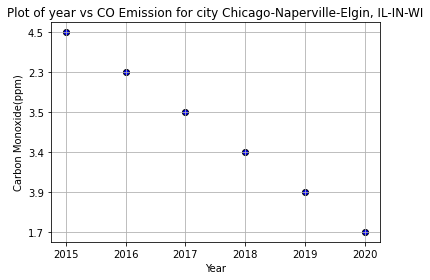

Cleveland-Elyria, OH
79      2020
558     2019
1047    2018
1544    2017
2042    2016
2528    2015
Name: Year, dtype: int64


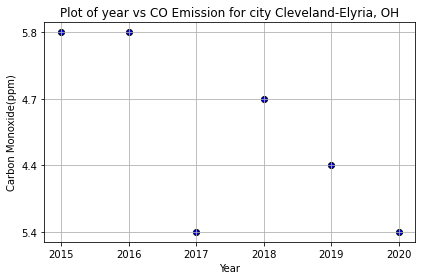

Columbus, OH
87      2020
566     2019
1055    2018
1552    2017
2050    2016
2536    2015
Name: Year, dtype: int64


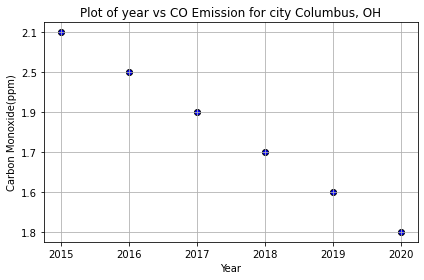

San Francisco-Oakland-Hayward, CA
94      2020
574     2019
1062    2018
1560    2017
2057    2016
2544    2015
Name: Year, dtype: int64


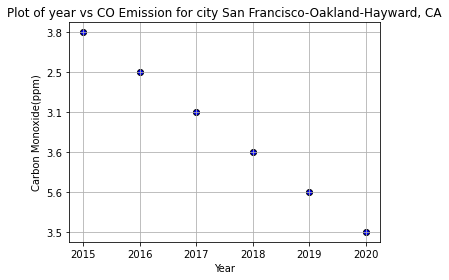

Washington-Arlington-Alexandria, DC-VA-MD-WV
383     2020
868     2019
1362    2018
1858    2017
2347    2016
2839    2015
Name: Year, dtype: int64


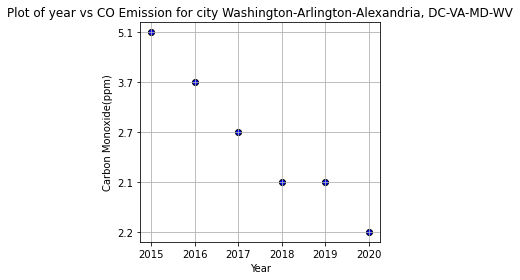

Los Angeles-Long Beach-Anaheim, CA
455     2020
943     2019
1441    2018
1938    2017
2424    2016
2914    2015
Name: Year, dtype: int64


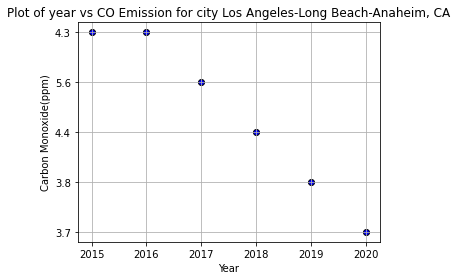

Detroit-Warren-Dearborn, MI
248     2020
731     2019
1226    2018
1720    2017
2214    2016
2705    2015
Name: Year, dtype: int64


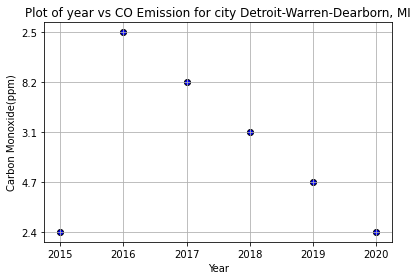

Portland-Vancouver-Hillsboro, OR-WA
113     2020
593     2019
1083    2018
1580    2017
2077    2016
2562    2015
Name: Year, dtype: int64


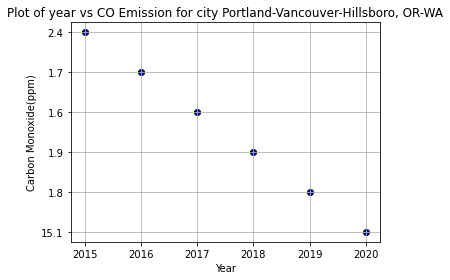

In [120]:
#loopin through cities and findin the realtion between years and carbon emission
col_choice = ["Chicago-Naperville-Elgin, IL-IN-WI","Cleveland-Elyria, OH","Columbus, OH","San Francisco-Oakland-Hayward, CA","Washington-Arlington-Alexandria, DC-VA-MD-WV","Los Angeles-Long Beach-Anaheim, CA","Detroit-Warren-Dearborn, MI","Portland-Vancouver-Hillsboro, OR-WA"]

for pos, col in enumerate(col_choice):  
    #Pick a first col
    print(col)
    y_axis= carbon_emi.loc[(carbon_emi["CBSA"]==col_choice[pos]),"CO 2nd Max 1-hr"]
    print(x_axis)
    x_axis=carbon_emi.loc[(carbon_emi["CBSA"]==col_choice[pos]),"Year"]
    f=plt.scatter(x_axis,y_axis,marker="o",facecolors="blue",edgecolors="black")
    plt.title(f"Plot of year vs CO Emission for city {col_choice[pos]}")
    plt.ylabel(f"Carbon Monoxide(ppm)")
    plt.xlabel(f"Year")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"YearvsCo{pos}.png")
    plt.show()
    



Chicago-Naperville-Elgin, IL-IN-WI


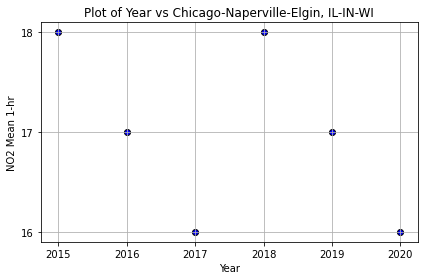

Cleveland-Elyria, OH


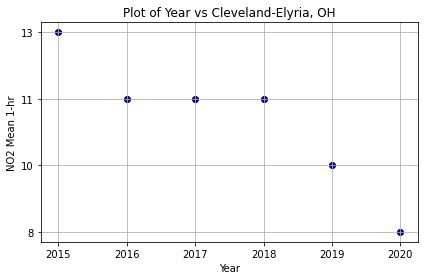

Columbus, OH


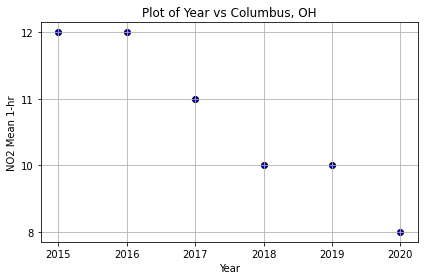

San Francisco-Oakland-Hayward, CA


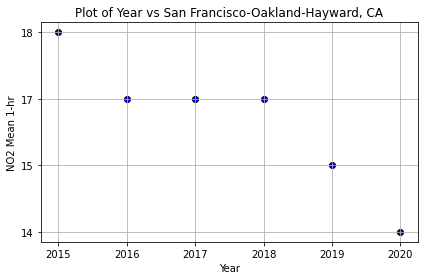

Washington-Arlington-Alexandria, DC-VA-MD-WV


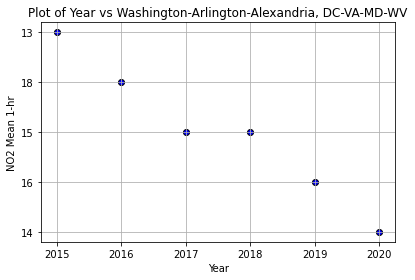

Los Angeles-Long Beach-Anaheim, CA


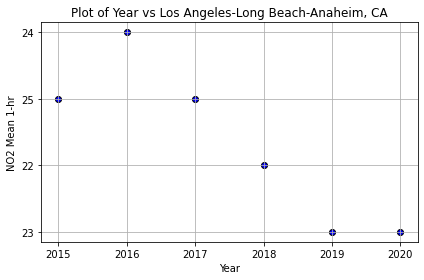

Detroit-Warren-Dearborn, MI


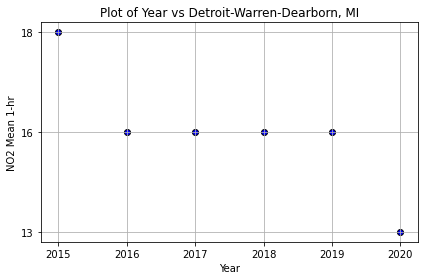

Portland-Vancouver-Hillsboro, OR-WA


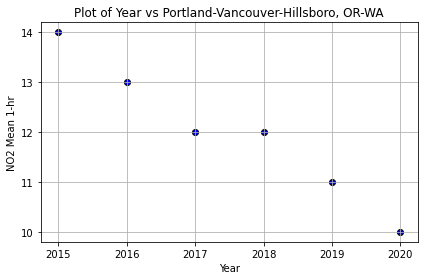

In [121]:
col_choice = ["Chicago-Naperville-Elgin, IL-IN-WI","Cleveland-Elyria, OH","Columbus, OH","San Francisco-Oakland-Hayward, CA","Washington-Arlington-Alexandria, DC-VA-MD-WV","Los Angeles-Long Beach-Anaheim, CA","Detroit-Warren-Dearborn, MI","Portland-Vancouver-Hillsboro, OR-WA"]

for pos, col in enumerate(col_choice):  
    #Pick a first col
    print(col)
    y_axis= carbon_emi.loc[(carbon_emi["CBSA"]==col_choice[pos]),"NO2 Mean 1-hr"]
    x_axis=carbon_emi.loc[(carbon_emi["CBSA"]==col_choice[pos]),"Year"]
    f=plt.scatter(x_axis,y_axis,marker="o",facecolors="blue",edgecolors="black")
    plt.title(f"Plot of Year vs {col_choice[pos]}")
    plt.ylabel(f"NO2 Mean 1-hr")
    plt.xlabel(f"Year")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"YearvsNO{pos}.png")
    plt.show()
